In [ ]:
from google.colab import drive
drive.mount('/content/drive')
     

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os
import tensorflow as tensf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as pplot
import numpy

In [ ]:
zip_ref = zipfile.ZipFile('/content/drive/My Drive/Datasets/CNN_dataset.zip', 'r') #dataset loaded
zip_ref.extractall() 
zip_ref.close()
     

In [ ]:
from IPython.display import clear_output
import skimage
from skimage import transform
from glob import glob
from sklearn import metrics
import pandas as pd
import seaborn as sn
import numpy as nmp
from PIL import Image
import matplotlib.pyplot as pplot
from skimage import io, color
import tqdm
from skimage.transform import *

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

import tensorflow as tensf
from tensorflow import keras

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, AvgPool2D
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping


In [ ]:
xray_data = []
xray_class = []
train_xray_data  = []
train_xray_class = []
test_xray_data  = []
test_xray_class = []
IMG_SIZE = (32,32)

In [ ]:
def collect_data(filepath, label, new_shape):
    all_images = glob(filepath)
    print(len(all_images))
    for item in all_images:
        xray_class.append(label)
        image = skimage.io.imread(item)
        image = color.gray2rgb(image)
        image = skimage.transform.resize(image=image, output_shape=new_shape)
        xray_data.append(nmp.array(image))

In [ ]:
cc00 = '/content/CNN_dataset/AbdomenCT/*.jpeg'
cc11 = '/content/CNN_dataset/ChestCT/*.jpeg'
cc22 = '/content/CNN_dataset/CXR/*.jpeg'
cc33 = '/content/CNN_dataset/Hand/*.jpeg'
cc44 = '/content/CNN_dataset/HeadCT/*.jpeg'

In [ ]:
classes_path_list = [cc00,cc11,cc22,cc33,cc44]
xray_data.clear()
xray_class.clear()
for i in range(len(classes_path_list)):
    collect_data(classes_path_list[i], i, IMG_SIZE)

10000
10000
10000
10000
10000


In [ ]:
xray_data[1].shape

(32, 32, 3)

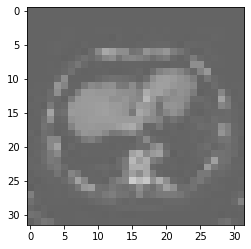

In [ ]:
pplot.imshow(xray_data[11])

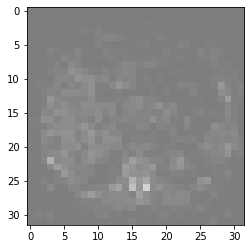

In [ ]:
pplot.imshow(xray_data[11110])

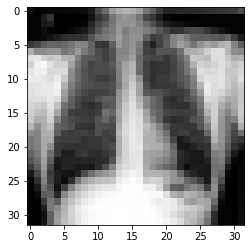

In [ ]:
pplot.imshow(xray_data[21106])

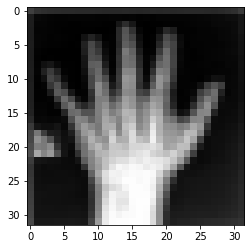

In [ ]:
pplot.imshow(xray_data[31105])

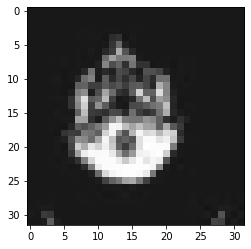

In [ ]:
pplot.imshow(xray_data[42206])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xray_data, to_categorical(nmp.array(xray_class)), test_size = 0.20)

In [ ]:
model = tensf.keras.Sequential()
model.add(Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        8224      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 8, 8, 32)         

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_log = model.fit(nmp.array(X_train), y_train,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_split=.1)

Epoch 1/10
563/563 [==============================] - 5s 6ms/step - loss: 0.1122 - accuracy: 0.9648 - val_loss: 0.0085 - val_accuracy: 0.9977
Epoch 2/10
563/563 [==============================] - 3s 6ms/step - loss: 0.0158 - accuracy: 0.9958 - val_loss: 0.0057 - val_accuracy: 0.9990
Epoch 3/10
563/563 [==============================] - 4s 7ms/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.0043 - val_accuracy: 0.9985
Epoch 4/10
563/563 [==============================] - 3s 6ms/step - loss: 0.0083 - accuracy: 0.9975 - val_loss: 0.0059 - val_accuracy: 0.9983
Epoch 5/10
563/563 [==============================] - 3s 6ms/step - loss: 0.0066 - accuracy: 0.9982 - val_loss: 0.0030 - val_accuracy: 0.9987
Epoch 6/10
563/563 [==============================] - 3s 6ms/step - loss: 0.0095 - accuracy: 0.9970 - val_loss: 0.0309 - val_accuracy: 0.9930
Epoch 7/10
563/563 [==============================] - 4s 7ms/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.0034 - val_accuracy: 0.9985
Epoch 

In [ ]:
print("Accuracy Final: {:.2f}%".format(model.evaluate(nmp.array(X_test), nmp.array(y_test))[1]*100)) #result

313/313 [==============================] - 1s 4ms/step - loss: 0.0017 - accuracy: 0.9993
Test_Accuracy: 99.93%
